In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

filepath = "../data_collection/training/chat-ange.mp3"

# File setting
filename = filepath.split("/")[-1]
dist_figure = "spectrogram-figure"
dist_matrix = "spectrogram-matrix"

out_figure = os.path.join(dist_figure, filename.replace(".mp3", ".npy"))
out_matrix = os.path.join(dist_matrix, filename.replace(".mp3", ".npy"))

# Parameters for mel-spectrogram
sample_rate = 22050  # Standard sample rate for Librosa. Basically equal to sample rate of the audio.
n_mels = 128         # Number of mel bands
n_fft = 2048         # Length of the FFT window -> ブログのやつでは173(分解能を11.5ms にするため！)
hop_length = 256     # Number of samples between successive frames
win_length = n_fft     # window length
segment_duration = 2  # seconds

In [7]:
y, sr = librosa.load(filepath, sr = sample_rate)
print(f"audio shape is {y.shape}, sample rate is {sr}")

n_total = len(y)
# 0-2, 1-3, 2-4,,,
num_segments = int( n_total / sr ) - segment_duration + 1
matrix_list = []
for segment_index in range(num_segments):
    segment = y[segment_index * sr : (segment_index + segment_duration) * sr ]

    mel_spec = librosa.feature.melspectrogram(
        y=segment, 
        sr=sr, n_fft=n_fft, win_length=win_length, hop_length=hop_length)

    ## dB単位に変換
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    # mel_spec_db_normalized = librosa.util.normalize(mel_spec_db)

    matrix_list.append(mel_spec_db)

# Save to npy file.
np.save(out_matrix, matrix_list)

audio shape is (15287296,), sample rate is 22050


In [ ]:
y, sr = librosa.load(filepath, sr = sample_rate)
print(f"audio shape is {y.shape}, sample rate is {sr}")

n_total = len(y)

mel_spec = librosa.feature.melspectrogram(
    y=y[0: sr * 60], 
    sr=sr, n_fft=n_fft, win_length=win_length, hop_length=hop_length)

## dB単位に変換
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
# mel_spec_db = librosa.util.normalize(mel_spec_db)

audio shape is (15442944,), sample rate is 22050


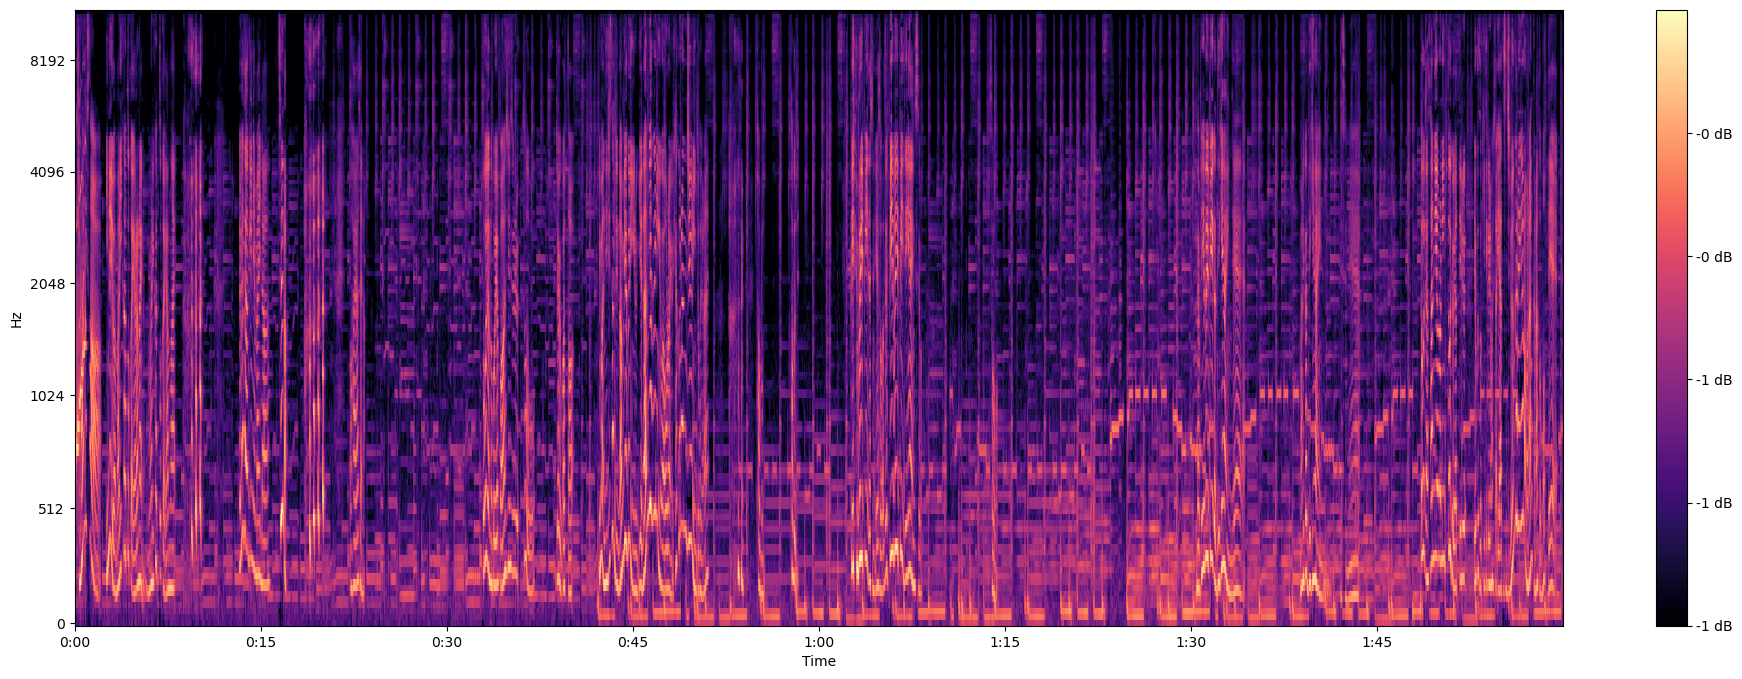

In [49]:
# visualization

# ave = np.zeros(shape=mel_spec_db.shape)
# for m in matrix_list: ave += m
# ave /= len(matrix_list)
# print(ave.shape)

ave = mel_spec_db

## プロット
plt.figure(figsize=(24, 8))
img = librosa.display.specshow(ave, x_axis='time',
                        y_axis='mel', sr=sr)

plt.colorbar(img, format='%+2.0f dB')

# plt.savefig(out_figure)
plt.show()